Import Lib and Mall_Customers Data

In [11]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


READ DATA AGE & ANNUAL INCOME

In [2]:
df=df[['Age','Annual Income (k$)']]
df

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


Feature Scaling Using Standrdization

In [4]:
def std(values):
  return (values-values.mean())/(values.std())
cols = ['Age','Annual Income (k$)']
df[cols]=df[cols].apply(std)
df[cols]

,Age,Annual Income (k$)
0,-1.421003,-1.734646
1,-1.277829,-1.734646
2,-1.349416,-1.696572
3,-1.134655,-1.696572
4,-0.561958,-1.658498
...,...,...
195,-0.275610,2.263112
196,0.440260,2.491555
197,-0.490371,2.491555
198,-0.490371,2.910368


 Clustering with KMeans

In [5]:
X = df[['Age','Annual Income (k$)']]
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y = km.fit_predict(X)
df['cluster'] = y
km.cluster_centers_

array([[-0.27843594,  0.9660948 ],
       [-0.87255375, -0.82885622],
       [ 1.21386232, -0.35538902]])

PLOT CLUSTERS

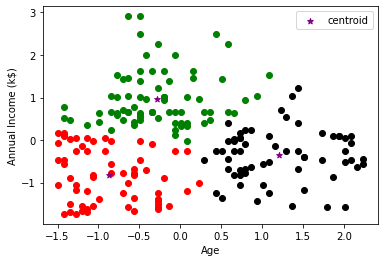

In [6]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()

DRAW ELBOW DIAGRAM

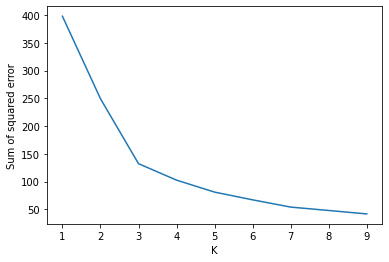

In [7]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Annual Income (k$)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Clustering with three feature

In [58]:
df8=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
df8.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [59]:
def std(values):
  return (values-values.mean())/(values.std())
cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
df8[cols]=df8[cols].apply(std)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [60]:
X = df8[['Age','Annual Income (k$)','Spending Score (1-100)']]
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
y = km.fit_predict(X)
df8['cluster'] = y
km.cluster_centers_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array([[ 0.52974416, -1.28727809, -1.23337167],
       [-0.42773261,  0.97240705,  1.21304137],
       [-0.97822376, -0.74119985,  0.46627028],
       [ 1.20182469, -0.2351832 , -0.05223672],
       [ 0.07314728,  0.97250467, -1.19429976]])

CHANGE FOLLOWING CODE FOR 3D GRAPH

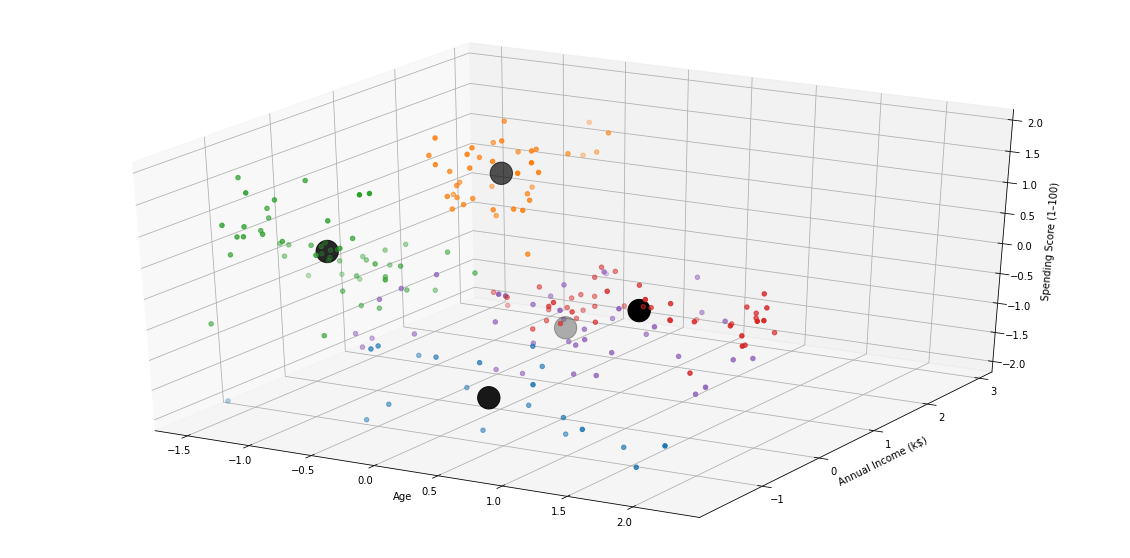

In [70]:
fig = plt.figure(figsize=(20,10))

df1 = df8[df8['cluster']==0]
df2 = df8[df8['cluster']==1]
df3 = df8[df8['cluster']==2]
df4 = df8[df8['cluster']==3]
df5 = df8[df8['cluster']==4]


ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age, df1['Annual Income (k$)'],df1['Spending Score (1-100)'] )
ax.scatter(df2.Age, df2['Annual Income (k$)'], df2['Spending Score (1-100)'])
ax.scatter(df3.Age, df3['Annual Income (k$)'], df3['Spending Score (1-100)'])
ax.scatter(df4.Age, df4['Annual Income (k$)'], df4['Spending Score (1-100)'])
ax.scatter(df5.Age, df5['Annual Income (k$)'], df5['Spending Score (1-100)'])
centers = km.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=500);
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1–100)')
plt.show()